initial parameters of mixture:

  gri30:

       temperature            1000  K
          pressure          200000  Pa
           density        0.712352  kg/m^3
  mean mol. weight         29.6141  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.5855e+05        1.358e+07     J
   internal energy      1.7779e+05        5.265e+06     J
           entropy          8726.5        2.584e+05     J/K
    Gibbs function      -8.268e+06       -2.448e+08     J
 heat capacity c_p          1766.7        5.232e+04     J/K
 heat capacity c_v            1486        4.401e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2      0.0666667       0.00453811         -19.5336
                O2       0.733333         0.792385         -26.1959
               CH4      0.0666667        0.0361151         -36.

('210', '2.09', '3028.15', '101936')
('211', '2.10', '3028.11', '101916')
('212', '2.11', '3028.07', '101897')
('213', '2.12', '3028.03', '101878')
('214', '2.13', '3027.99', '101860')
('215', '2.14', '3027.96', '101842')
('216', '2.15', '3027.92', '101825')
('217', '2.16', '3027.89', '101809')
('218', '2.17', '3027.86', '101793')
('219', '2.18', '3027.82', '101778')
('220', '2.19', '3027.79', '101763')
('221', '2.20', '3027.76', '101749')
('222', '2.21', '3027.74', '101735')
('223', '2.22', '3027.71', '101721')
('224', '2.23', '3027.68', '101708')
('225', '2.24', '3027.65', '101696')
('226', '2.25', '3027.63', '101684')
('227', '2.26', '3027.60', '101672')
('228', '2.27', '3027.58', '101661')
('229', '2.28', '3027.56', '101650')
('230', '2.29', '3027.54', '101639')
('231', '2.30', '3027.51', '101629')
('232', '2.31', '3027.49', '101619')
('233', '2.32', '3027.47', '101609')
('234', '2.33', '3027.45', '101600')
('235', '2.34', '3027.44', '101591')
('236', '2.35', '3027.42', '101582')
(

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Andrzej\Anaconda2\envs\salamandra\lib\lib-tk\Tkinter.py", line 1541, in __call__
    return self.func(*args)
  File "<ipython-input-2-b2ab25304c8c>", line 187, in calc
    self.output()
  File "<ipython-input-2-b2ab25304c8c>", line 198, in output
    label1.image = photo
NameError: global name 'photo' is not defined


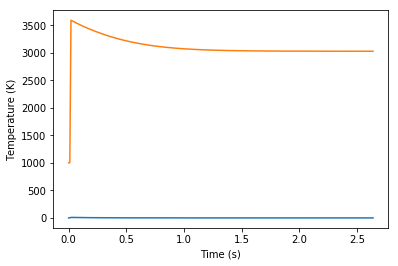

In [2]:
from Tkinter import *
import os
import csv
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk

        
class App:
    
    def __init__(self,master): 
        frame = LabelFrame(master,text='Initial mixture condition')
        frame.pack(side=LEFT)
        
        frame1 = LabelFrame(master,text='Results of simulation')
        frame1.pack(side=LEFT)
        
        #results frame
        self.tt = Label(frame1,text='Plot of temperature')
        self.tt.pack()
        self.pt = Canvas(frame1,width=420,height=260)
        self.pt.pack()
        
        Tmax = 0
        self.lTmax = StringVar()
        self.lTmax.set('%5.2f'%Tmax)
        Label(frame1,text='Tmax [K]').pack()
        Label(frame1,textvariable=self.lTmax).pack()
        
        self.tp = Label(frame1,text='Plot of pressure')
        self.tp.pack()
        self.pp = Canvas(frame1,width=420,height=260)
        self.pp.pack()
        
        pmax = 0
        self.lpmax = StringVar()
        self.lpmax.set('%s'%pmax)
        Label(frame1,text='pmax [Pa]').pack()
        Label(frame1,textvariable=self.lpmax).pack()
        
        #initial condition frame
        self.frmol = Label(frame,text='Fuel mole fractions')
        self.frmol.pack()
        
        self.h2 = Label(frame,text='H2:')
        self.h2.pack()
        self.h2e = Entry(frame)
        self.h2e.pack()
        self.h2e.insert(0,"1")
        
        self.ch4 = Label(frame,text='CH4:')
        self.ch4.pack()
        self.ch4e = Entry(frame)
        self.ch4e.pack()
        self.ch4e.insert(0,"1")
        
        self.c2h6 = Label(frame,text='C2H6:')
        self.c2h6.pack()
        self.c2h6e = Entry(frame)
        self.c2h6e.pack()
        self.c2h6e.insert(0,"1")
        
        self.c3h8 = Label(frame,text='C3H8:')
        self.c3h8.pack()
        self.c3h8e = Entry(frame)
        self.c3h8e.pack()
        self.c3h8e.insert(0,"1")
        
        self.eq = Label(frame,text='Equivalence ratio:')
        self.eq.pack()
        self.eqe = Entry(frame)
        self.eqe.pack()
        self.eqe.insert(0,"1")
        
        self.temp = Label(frame,text='Temperature (K):')
        self.temp.pack()
        self.tempe = Entry(frame)
        self.tempe.pack()
        self.tempe.insert(0,"1000")
        
        self.press = Label(frame,text='Pressure (Pa): (>101425)')
        self.press.pack()
        self.presse = Entry(frame)
        self.presse.pack()
        self.presse.insert(0,"200000")
        
        self.ox = Label(frame,text='Choose the oxidant')
        self.ox.pack()
        
        self.ox1 = Listbox(frame,height = 2)
        self.ox1.pack()
        self.ox1.insert(2,'Oxygen')
        self.ox1.insert(1,'Air')
        self.ox1.activate(index=1)
        
        self.run = Button(frame,text='Run calculations',command=self.calc)
        self.run.pack()
        
        
    def calc(self):
        gas = ct.Solution('gri30.xml')
        air = ct.Solution('gri30.xml')
        
        h2fr = float(self.h2e.get())
        ch4fr = float(self.ch4e.get())
        c2h6fr = float(self.c2h6e.get())
        c3h8fr = float(self.c3h8e.get())
        eq_ratio = float(self.eqe.get())
        temp = float(self.tempe.get())
        press = float(self.presse.get())
        
        Tmax = temp
        pmax=press
        
        selection = self.ox1.curselection()[0]
        oxid = int(selection)

        air.TPX = 293.15, ct.one_atm, ('O2:1,N2:3.76')

        gas.TP = temp, press
        if(oxid == 1.0): 
            gas.set_equivalence_ratio(eq_ratio, 'H2:%s,CH4:%s,C2H6:%s,C3H8:%s'%(h2fr,ch4fr,c2h6fr,c3h8fr), 'O2:1.0,N2:3.76')
        else: 
            gas.set_equivalence_ratio(eq_ratio, 'H2:%s,CH4:%s,C2H6:%s,C3H8:%s'%(h2fr,ch4fr,c2h6fr,c3h8fr), 'O2:1.0') 

        print('initial parameters of mixture:')    
        gas()

        tank = ct.Reactor(gas)
        tank.volume = 1.0
        env = ct.Reservoir(air)

        outlet = ct.Valve(tank,env)
        ro = float(tank.density)
        dp = float(tank.thermo.P-env.thermo.P)
        outlet.set_valve_coeff((1e-03)*((ro/dp)**(0.5)))

        sim = ct.ReactorNet([tank])

        print('results of simulation:')
        time = 0.0
        n = 1
        outfile = open('tankleak','w')
        csvfile = csv.writer(outfile)
        csvfile.writerow(['eq_ratio = %s'%eq_ratio, 'H2fr = %s'%h2fr, 'CH4fr = %s'%ch4fr, 'C2H6fr = %s'%c2h6fr, 'C3H8fr = %s'%c3h8fr])
        csvfile.writerow(['n', 'time (s)', 'T (K)', 'P (Pa)'])
        states = ct.SolutionArray(gas, extra=['t'])
        states.append(tank.thermo.state, t=time)
        print('n', 'time(s)','T(K)','P(Pa)')
        print('%03.0f'%n, '%4.2f'%time, '%5.2f'%tank.thermo.T, '%6.0f'%tank.thermo.P)
        csvfile.writerow(['%02.0f'%n, '%4.2f'%time, '%5.2f'%tank.thermo.T, '%6.0f'%tank.thermo.P])

        while tank.thermo.P > (ct.one_atm+100):
            time += 1e-2
            n += 1
            sim.advance(time)
            states.append(tank.thermo.state, t=time)
            print('%03.0f'%n, '%4.2f'%time, '%5.2f'%tank.thermo.T, '%6.0f'%tank.thermo.P)
            csvfile.writerow(['%02.0f'%n, '%4.2f'%time, '%5.2f'%tank.thermo.T, '%6.0f'%tank.thermo.P])
            if tank.thermo.P > pmax:
                pmax = tank.thermo.P
            self.lpmax.set('%6.0f'%pmax)
            if tank.thermo.T > Tmax:
                Tmax = tank.thermo.T
            self.lTmax.set('%5.2f'%Tmax)

        outfile.close()
        print('Output written to file tankleak.csv')
        print('Directory: '+os.getcwd())
        
        plt.clf()
        plt.subplot(1,1,1)
        h = plt.plot(states.t, states.P/1e5)
        plt.xlabel('Time (s)')
        plt.ylabel('Pressure (bar)')
        plt.savefig('pressplot.png', bbox_inches='tight')
        #plt.show()
        plt.subplot(1,1,1)
        plt.plot(states.t, states.T)
        plt.xlabel('Time (s)')
        plt.ylabel('Temperature (K)')
        plt.savefig('tempplot.png', bbox_inches='tight')
        #plt.show()
        #self.lpmax.set('pmax = %s Pa'%pmax)
        #self.lTmax.set('Tmax = %s K'%Tmax)
        self.output()
    
    
    def output(self):
        im1= Image.open('pressplot.png')
        im2= Image.open('tempplot.png')
        plt1 = ImageTk.PhotoImage(im1)
        plt2 = ImageTk.PhotoImage(im2)
        self.pt.create_image(0,0,image=plt2,anchor=NW)
        self.pp.create_image(0,0,image=plt1,anchor=NW)
        label1 = Label(image=plt2)
        label1.image = photo 
        label1.pack()
        label2 = Label(image=plt1)
        label2.image = photo 
        label2.pack()
    
    
root = Tk()
root.geometry("570x670")
root.resizable(0, 0)
app = App(root)
root.mainloop()